## CMPE 462 HOMEWORK 1
Due Date: 21.03.2019

In [252]:
# Allowed libraries
import numpy as np
import matplotlib.pyplot as plt

# For loading data, you can import other libraries, but further usage is not allowed.
from sklearn import datasets

### 1.) Review bias/variance dilemma.
Replicate the bias-variance-plot (bias,
variance and error vs. model complexity) given in Figure 4.6 in the textbook
or in lecture notes [W04.pdf, pg.52]. For this:

* Generate 20 values {$x^t$} from the range [0, 5] from uniform distribution.  
* Generate 100 different samples $X_s$. Each sample contains 20 instances {$x^t, y^t_s$} where $y^t_s = f(x^t) + \epsilon$, $f(x) =2× sin(1.5 × x)$, and $ \epsilon ∼ N (0, 1)$.
* For each sample, fit polynomial models of order 1,3, and 5.
* Plot bias, variance and error of these models.

Biases of fits order[1,3,5]    :	 [1.6385775099154927, 1.0558911758702569, 0.99626144318474252]
Variances of fits order[1,3,5] :	 [0.094991372810326768, 0.1944721055577204, 0.29299064292571803]
Errors of of fits order[1,3,5] :	 [2.7799276288111834, 1.3093782808383942, 1.285527506102264]


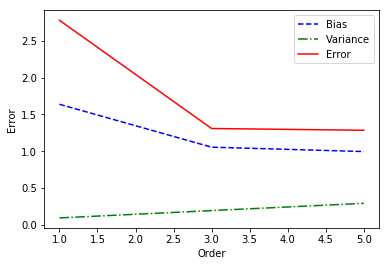

In [253]:
# Solution Here
# Generate 100 different samples.
SIZE = 20
SAMPLE_COUNT = 100

def polyfit(x,r,order):
    D = []
    for cur_x in x:
        inter_l = []
        for i in range(0,order+1):
            inter_l.append(cur_x**i)
        D.append(inter_l)
    
    r = np.array(r).T
    D = np.array(D)
    first_part = np.linalg.inv(np.matmul(D.T,D))
    second_part = np.matmul(first_part,D.T)
    w = np.matmul(second_part,r)
    return w

def calc_y(x):
    return 2 * np.sin(1.5 * x)

# g_mean is the order 1 means of lists of lists order_1_fits.
def calc_bias(g_mean,r):
    # Convert the lists to np arrays for convenience  
    r = np.array(r)
    g_mean = np.array(g_mean)
    
    bias_square = np.mean((g_mean - r)**2)
    return np.sqrt(bias_square)

# g is the order 1/3/5 (only one of them) fit lists of list.
def calc_variance(g,g_mean):
    g_mean = np.array(g_mean)
    g_mean = np.tile(g_mean,(SAMPLE_COUNT,1))
    
    difference = g-g_mean
    return np.mean(difference**2)

def calc_g_mean(g):
    g = np.array(g)
    return np.mean(g, axis=0) 
    
def calc_error(var,bias):
    return bias**2 + var
    
def fit(x,r,order):
    # I have implemented the polyfit myself, however I will use polyval for getting the polynom
    coeffs = polyfit(x,r,order)
    return np.polyval(np.flip(coeffs,axis=0),x)

# Generate 20 values
x_values = np.random.uniform(low=0,high=5,size=SIZE)
r_values_list = []

order_1_fits = []
order_3_fits = []
order_5_fits = []


# Generate the samples
# For each sample fit a polynomial model of order 1,3,5

for i in range(SAMPLE_COUNT):
    sample = calc_y(x_values) + np.random.normal(loc=0,scale=1,size=SIZE)
    r_values_list.append(sample)
    
    fit_1 = fit(x_values,r_values_list[i],1)
    order_1_fits.append(fit_1)
    
    fit_3 = fit(x_values,r_values_list[i],3)
    order_3_fits.append(fit_3)
    
    fit_5 = fit(x_values,r_values_list[i],5)
    order_5_fits.append(fit_5)
    
r_values_list = np.array(r_values_list)

order_1_fits = np.array(order_1_fits)
order_3_fits = np.array(order_3_fits)
order_5_fits = np.array(order_5_fits)

orders = [1,3,5]

order_1_g_mean = calc_g_mean(order_1_fits)
order_3_g_mean = calc_g_mean(order_3_fits)
order_5_g_mean = calc_g_mean(order_5_fits)

order_fit_means = [order_1_g_mean,order_3_g_mean,order_5_g_mean]

# Calculate the biases for all orders
bias_order_1 = calc_bias(order_1_g_mean,r_values_list)
bias_order_3 = calc_bias(order_3_g_mean,r_values_list)
bias_order_5 = calc_bias(order_5_g_mean,r_values_list)
biases = [bias_order_1,bias_order_3,bias_order_5]


print("Biases of fits order[1,3,5]    :\t", biases)

# Calculate the variances for all orders
variance_order_1 = calc_variance(order_1_fits,order_1_g_mean)
variance_order_3 = calc_variance(order_3_fits,order_3_g_mean)
variance_order_5 = calc_variance(order_5_fits,order_5_g_mean)
variances = [variance_order_1,variance_order_3,variance_order_5]

print("Variances of fits order[1,3,5] :\t", variances)

# Calculate the errors for all orders
error_order_1 = calc_error(variance_order_1,bias_order_1)
error_order_3 = calc_error(variance_order_3,bias_order_3)
error_order_5 = calc_error(variance_order_5,bias_order_5)
errors = [error_order_1,error_order_3,error_order_5]

print("Errors of of fits order[1,3,5] :\t", errors)

# Plot the error/bias/variances of fits
plt.ylabel('Error')
plt.xlabel('Order')
plt.plot(orders,biases,'b--',label='Bias')
plt.plot(orders,variances,'g-.',label='Variance')
plt.plot(orders,errors,'r-',label='Error')
plt.legend()
plt.show()

### 2.) Review cross-validation.
Replicate the cross-validation error plot (training and validation error vs. model complexity plot) given in Figure 4.7 in the textbook or in lecture notes [W04.pdf, pg52]. For this:
* Generate 10 samples containing 100 instances as in part 1.
* Split each sample to training and validation sets, fit polynomial models of order 1,3, and 5.
* Plot mean training and validation error (mean square error) of each model.

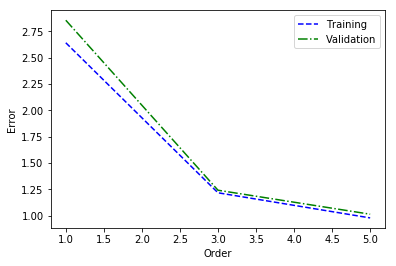

In [256]:
# Solution Here
SIZE = 100
SAMPLE_COUNT = 10
TRAINING_SPLIT_RATIO = 0.8

x_values = np.random.uniform(low=0,high=5,size=SIZE)
r_values_list = []

# Calculates the mean squared error
def calc_mse(g,r):
    g = np.array(g)
    r = np.array(r)
    
    difference = g-r
    return np.mean(difference**2)

# Shape of x_values: (100,)
# Shape of r_values_list (10,100)
def split_data(x_values,r_values_list,training_split_ratio):
    
    # Determine how many data points are going to be in x.
    x_values_length = len(x_values)
    training_length = int(training_split_ratio*x_values_length)
    
    # Split x values
    x_training = training_x = x_values[:training_length]
    x_validation = x_values[training_length:]
    
    # Splits the matrix horizontally
    r_training,r_validation = np.hsplit(np.array(r_values_list),[training_length])

    return x_training,x_validation,r_training,r_validation
    

# Generate the samples
# For each sample fit a polynomial model of order 1,3,5
for i in range(SAMPLE_COUNT):
    sample = calc_y(x_values) + np.random.normal(loc=0,scale=1,size=SIZE)
    r_values_list.append(sample)

# Split the data
x_training,x_validation,r_training,r_validation = split_data(x_values,r_values_list,TRAINING_SPLIT_RATIO)


# Define the training & validation fits arrays for each order
training_order_1_fits = []
validation_order_1_fits = []

training_order_3_fits = []
validation_order_3_fits = []

training_order_5_fits = []
validation_order_5_fits = []



# Get the fits for every one of them
for i in range(SAMPLE_COUNT):
    
    # Order 1 training and validation fits
    training_order_1_fit = fit(x_training,r_training[i],1)
    training_order_1_coeffs = polyfit(x_training,r_training[i],1)
    
    # Get the validation order 1 fit according to the coeffs we get from training order 1 fitting
    validation_order_1_fit = np.polyval(np.flip(training_order_1_coeffs,axis=0),x_validation)
    training_order_1_fits.append(training_order_1_fit)
    validation_order_1_fits.append(validation_order_1_fit)
    
    # Order 3 training and validation fits
    training_order_3_fit = fit(x_training,r_training[i],3)
    training_order_3_coeffs = polyfit(x_training,r_training[i],3)
    
    # Get the validation order 3 fit according to the coeffs we get from training order 3 fitting
    validation_order_3_fit = np.polyval(np.flip(training_order_3_coeffs,axis=0),x_validation)
    training_order_3_fits.append(training_order_3_fit)
    validation_order_3_fits.append(validation_order_3_fit)
    
    # Order 5 training and validation fits
    training_order_5_fit = fit(x_training,r_training[i],5)
    training_order_5_coeffs = polyfit(x_training,r_training[i],5)
    
    # Get the validation order 5 fit according to the coeffs we get from training order 5 fitting
    validation_order_5_fit = np.polyval(np.flip(training_order_5_coeffs,axis=0),x_validation)
    training_order_5_fits.append(training_order_5_fit)
    validation_order_5_fits.append(validation_order_5_fit)

# Convert arrays to np arrays for convenience
training_order_1_fits = np.array(training_order_1_fits)
validation_order_1_fits = np.array(validation_order_1_fits)

training_order_3_fits = np.array(training_order_3_fits)
validation_order_3_fits = np.array(validation_order_3_fits)

training_order_5_fits = np.array(training_order_5_fits)
validation_order_5_fits = np.array(validation_order_5_fits)

# Calculate the training errors for each order
training_order_1_error = calc_mse(training_order_1_fits,r_training)
training_order_3_error = calc_mse(training_order_3_fits,r_training)
training_order_5_error = calc_mse(training_order_5_fits,r_training)
training_errors = [training_order_1_error,training_order_3_error,training_order_5_error]

# Calculate the validation errors for each order

validation_order_1_error = calc_mse(validation_order_1_fits,r_validation)
validation_order_3_error = calc_mse(validation_order_3_fits,r_validation)
validation_order_5_error = calc_mse(validation_order_5_fits,r_validation)
validation_errors = [validation_order_1_error,validation_order_3_error,validation_order_5_error]

# Plot the training/validation error plot
orders = [1,3,5]
plt.ylabel('Error')
plt.xlabel('Order')
plt.plot(orders,training_errors,'b--',label='Training')
plt.plot(orders,validation_errors,'g-.',label='Validation')
plt.legend()
plt.show()

### 3.) Use of real dataset. 
Download Iris Data Set from UCI Machine Learning Repository. Randomly split it into training and test sets.
* For each feature, plot histogram of classes. For better visualiziation, plot classes in same plot but with different colors. (For this you can use plt.subplots)
* Consider only two classes: Iris Setosa and Iris Versicolour.
* Assuming Gaussian distribution, apply parametric classification, and find which particular feature (sepal length, sepal width, petal length, petal width) is most successful in classifying instances.
    - For this, treat each feature separately. find maximum likelihood estimate of the parameters $(μ, σ^2)$ of different classes using training set. (You can use plt.errorbar for visualization, use one column for each feature and visualize both classes in same plot using different colors).
    - Using these parameters, predict the classes of the instances in the test set, and calculate the error.

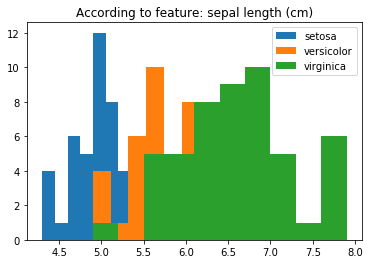

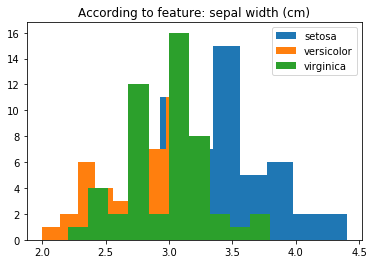

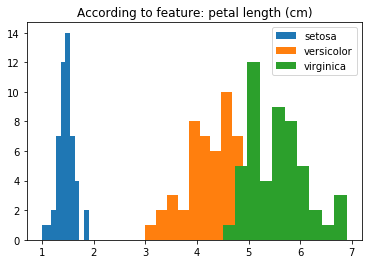

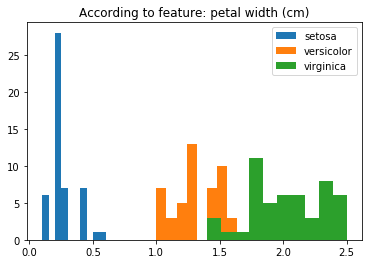

Features            |Total               |Errors              |Correct             |Error Percentage    
--------------------------------------------------------------------------------------------------------
sepal length (cm)   |20                  |3                   |17                  |15                  
sepal width (cm)    |20                  |3                   |17                  |15                  
petal length (cm)   |20                  |0                   |20                  |0                   
petal width (cm)    |20                  |1                   |19                  |5                   

Minimum Error is made in feature  petal length (cm)   0 %
Best Classifier Feature is  petal length (cm)


In [258]:
# Solution Here
iris = datasets.load_iris()
TRAINING_SPLIT_RATIO = 0.8

'''
iris.data = features list list. (150,4)
iris.target = index of the classes
iris.feature_names = feature names in order (4,)
iris.target_names = names of the classes in order (3,)
'''

def split_training_test(data,training_split_ratio):
    training_length = int(len(data)*training_split_ratio)
    training = data[:training_length]
    test = data[training_length:]
    return training,test
    
# Plot the bar charts
def plot_hist(iris,classes):
    class_count = len(iris.target_names)
    feature_count = len(iris.feature_names)

    for feature_index,feature in enumerate(iris.feature_names):
        feature_class_dict = {c:[] for c in iris.target_names}

        for index,el in enumerate(iris.data):
            feature_class_dict[classes[index]].append(el[feature_index])
        #print(feature_class_dict)
        for item in iris.target_names:
            plt.hist(feature_class_dict[item], label=item)
        plt.title("According to feature: " + feature)
        plt.legend()
        plt.show()
        

def max_likelihood(mu,sigma,x):
    first_part = 1 / (np.sqrt(2 * np.pi) * sigma)
    second_part = np.exp(-1 * (((x - mu)**2) / (2 * (sigma**2))))
    return first_part * second_part

def calc_mu(x_values):
    return np.mean(x_values)

def calc_sigma(x_values):
    return np.std(x_values)

        
classes = []

# Convert classes from number to names
for el in iris.target:
    if el == 0:
        classes.append('setosa')
    elif el == 1:
        classes.append('versicolor')
    else:
        classes.append('virginica')

plot_hist(iris,classes)


# Slice the last class there is 50 of it
classes = np.array(classes[:100])
dataset = np.array(iris.data[:100])

classes_to_append = np.array([[e] for e in classes])
# Add class names to entries
dataset = np.append(dataset,classes_to_append,axis=1)

# Shuffle the dataset
np.random.shuffle(dataset)

training_data,test_data = split_training_test(dataset,TRAINING_SPLIT_RATIO)

# SETOSA = 0, VERSICOLOR = 1

# Only use training data to find the mus and sigmas
features_classes_data = [] # All features, 2 classes
features_classes_test_data = []

features_classes_mu = []  # All features, 2 classes mus
features_classes_sigma = []  # All features, 2 classes sigmas

for feature_index,feature in enumerate(iris.feature_names):
    feature_setosa_data = []
    feature_versicolor_data = []
    
    feature_setosa_test_data = []
    feature_versicolor_test_data = []
    
    for data in training_data:
        if data[4] == 'setosa':
            feature_setosa_data.append(data[feature_index])
        elif data[4] == 'versicolor':
            feature_versicolor_data.append(data[feature_index])
    
    for data in test_data:
        if data[4] == 'setosa':
            feature_setosa_test_data.append(data[feature_index])
        elif data[4] == 'versicolor':
            feature_versicolor_test_data.append(data[feature_index])
    
    feature_setosa_data = np.array(feature_setosa_data).astype(np.float)
    feature_versicolor_data = np.array(feature_versicolor_data).astype(np.float)
    feature_classes_data = [feature_setosa_data,feature_versicolor_data] # one feature two classes data
    features_classes_data.append(feature_classes_data)
    
    feature_setosa_test_data = np.array(feature_setosa_test_data).astype(np.float) 
    feature_versicolor_test_data = np.array(feature_versicolor_test_data).astype(np.float)
    feature_classes_test_data = [feature_setosa_test_data,feature_versicolor_test_data]
    features_classes_test_data.append(feature_classes_test_data)
    
    # Mu and sigma is just calculated according to the training data
    feature_classes_mu = [calc_mu(feature_setosa_data),calc_mu(feature_versicolor_data)]
    features_classes_mu.append(feature_classes_mu)
    
    feature_classes_sigma = [calc_sigma(feature_setosa_data),calc_sigma(feature_versicolor_data)]
    features_classes_sigma.append(feature_classes_sigma)
    

# Get test data points for features*classes
answers = (test_data[:,4])
errors_by_feature = np.zeros((4))
for feature_index,feature in enumerate(iris.feature_names):
    setosa_likelihoods = max_likelihood(features_classes_mu[feature_index][0],
                                       features_classes_sigma[feature_index][0],
                                       np.array(test_data[:,feature_index]).astype(float))
    
    versicolor_likelihoods = max_likelihood(features_classes_mu[feature_index][1],
                                       features_classes_sigma[feature_index][1],
                                       np.array(test_data[:,feature_index]).astype(float))
    for index,answer in enumerate(answers):
        if answer == 'setosa':
            if setosa_likelihoods[index] < versicolor_likelihoods[index]:
                errors_by_feature[feature_index]+=1
        if answer == 'versicolor':
            if versicolor_likelihoods[index] < setosa_likelihoods[index]:
                errors_by_feature[feature_index]+=1

# Print Error Counts
test_length = len(test_data)
errors_by_feature = [int(el) for el in errors_by_feature]
totals = [test_length,test_length,test_length,test_length]
corrects = np.array(totals) - np.array(errors_by_feature)
error_percentages = [int(per) for per in ((np.array(errors_by_feature)/np.array(totals))*100)]

titles = ['Features         ', 'Total', 'Errors', 'Correct','Error Percentage']
data = [titles] + list(zip(iris.feature_names, totals, errors_by_feature, corrects,error_percentages))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(20) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))
        
min_index = np.argmin(errors_by_feature)
print("\nMinimum Error is made in feature ", iris.feature_names[min_index], " ", error_percentages[min_index],"%")
print("Best Classifier Feature is ", iris.feature_names[min_index])